# Simulazione del Moto Geometrico Browniano


Il Moto Geometrico Browniano è definito a partire da S(0)>0 e dalla seguente Equazione Stocastica Differenziale:


$\Large dS_t = \mu S_t dt + \sigma S_t dW_t$


Fissate le condizioni al contorno, la soluzione che mostra come il prezzo evolve nel tempo è data da:

$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

In [96]:
import numpy as np
import matplotlib.pyplot as plt

### Parametri

In [105]:
# drift
mu = 0.1
# numero di passi
n = 100
# numero di anni
T = 1
# numero di simulazioni
M = 5
# prezzo iniziale
S0 = 100
# volatilità
sigma = 0.3

### Simulazione delle possibili traiettorie

In [102]:
# calcolo la lunghezza di ogni time-step
dt = T/n

# propriamente sto calcolando un dSt ovvero la differenza di prezzo tra un istante e quello successivo
St = np.exp((mu - sigma ** 2 / 2) * dt+ sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T)

# includi array di 1 per poter partire sempre da S0=100
St = np.vstack([np.ones(M), St])

# ricavo il prezzo istante per istante facendo un prodotto cumulato.
St = S0 * St.cumprod(axis=0)

### Partiziono il tempo

In [103]:
# Partiziono il tempo in n+1 parti
time = np.linspace(0,T,n+1)

# Costruisco una matrice (M,n+1) per tutte le simulazioni
tt = np.full(shape=(M,n+1), fill_value=time).T

### Plot


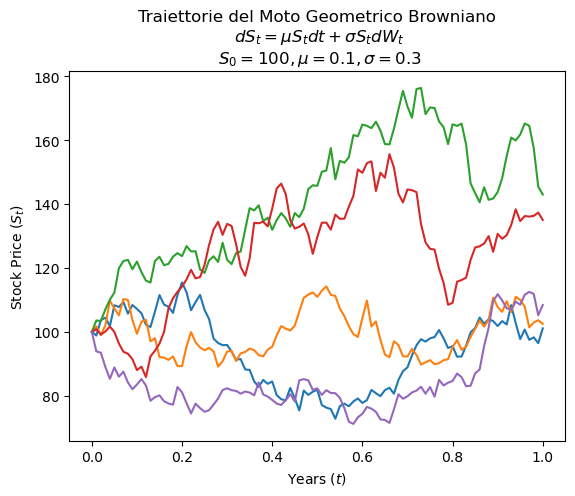

In [104]:
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Traiettorie del Moto Geometrico Browniano\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()